## Orbiters

The idea underlying the patterns in this notebook is a simple one - We start with two concentric circles that form our orbits, and have an "orbiter" in each of them. Over time we track the positions of the two orbiters in their orbits for different values of relative angular velocities. What makes things interesting is that we simultaneously linearly interpolate between the two orbiters as they travel in their orbits, thus giving us multiple curves that fill the space between them, which create some really cool patterns.

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

#### Define orbiters & helper function

In [3]:
## we use this function to give us the curves that interpolate between the two orbits.

## n_pts is the numbers of points at which we sample the two orbits.

## npts is the number of curves that we have interpolate between the two orbits
## It is inclusive of and takes the position in the first orbit as the starting point,
## and the position in the second orbit as the ending point.
## Eg, npts = 3 with position in orbit 1 being (1,0) and in orbit 2 being (2,0) would give us ((1,0),(1.5,0),(2,0))

def linePlot(xa,xb,ya,yb,n_pts,npts):
    xmat = np.zeros((n_pts,npts))
    ymat = np.zeros_like(xmat)
    for ii in range(n_pts):
        xmat[ii] = np.linspace(xa[ii],xb[ii],npts)
        ymat[ii] = np.linspace(ya[ii],yb[ii],npts)
    return xmat, ymat

In [4]:
def orbiters(frac=(1,10),pts1=1000,pts2=10,flip=False):
    if flip: ## the flip argument swaps the values of pts1 and pts2
        pts1, pts2 = pts2, pts1
    num, den = frac
    lcm = np.lcm(num,den) ## we make sure that both orbiters complete integer valued revolutions of their orbits
    t_pts = np.linspace(0,2*lcm*np.pi,pts1) ## the different time instances at which the positions in the two orbits are sampled
    theta_1 = t_pts ## angular position of the inner orbiter at the different time points
    theta_2 = (num/den)*t_pts ## angular position of the outer orbiter at the different time points
    
    ## convert the polar co-ordinates into cartesian co-ordinates
    ## inner orbit is the unit circle (i.e., circle centered at the origin with radius 1)
    ## outer orbit is the inner orbit scaled by 2 (i.e., circle centered at the origin with radius 2)
    x1 = 1*np.cos(theta_1)
    y1 = 1*np.sin(theta_1)
    x2 = 2*np.cos(theta_2)
    y2 = 2*np.sin(theta_2)
    
    xlines, ylines = linePlot(x1,x2,y1,y2,pts1,pts2)
    return (xlines,ylines), (x1,y1), (x2,y2)

#### Single plot

In [5]:
def orbiters_single(frac=(1,10),pts1=1000,pts2=10,flip=False,facecolor='darkslateblue',linecolor='seashell'):
    tupl, tup1, tup2 = orbiters(frac=frac,pts1=pts1,pts2=pts2,flip=flip)
    x1, y1 = tup1
    x2, y2 = tup2
    xlines, ylines = tupl
    fig = plt.figure(1,figsize=(6,6))
    ax = fig.add_subplot(111,facecolor=facecolor)
    ax.scatter(x1,y1,c='seashell',marker='.',s=3)
    ax.scatter(x2,y2,c='seashell',marker='.',s=3)
    if pts2<pts1:
        for ii in range(pts2):
            ax.scatter(xlines[:,ii],ylines[:,ii],c=linecolor,marker='.',s=3)
    else:
        for ii in range(pts1):
            ax.scatter(xlines[ii],ylines[ii],c=linecolor,marker='.',s=3)
    ax.set_aspect('equal', 'box')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

Here we plot out the orbiters paths when the inner orbiter has an angular velocity of 1 rad/s and the outer orbiter has an angular velocity of 10 rad/s. We sample both orbiters' paths at 1000 time points and have a total of 10 curves including the two orbits (default values in the function above)

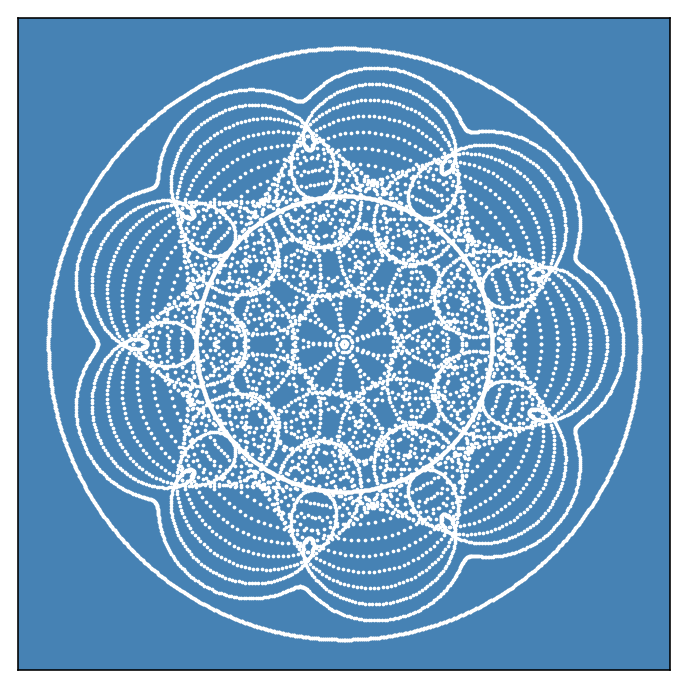

In [6]:
orbiters_single((1,10),facecolor='steelblue',linecolor='white')

Here we simply change the direction of motion between the two orbiters, with the inner one traveling anti-clockwise and the outer one traveling clockwise. All other parameters are the same as the previous example.

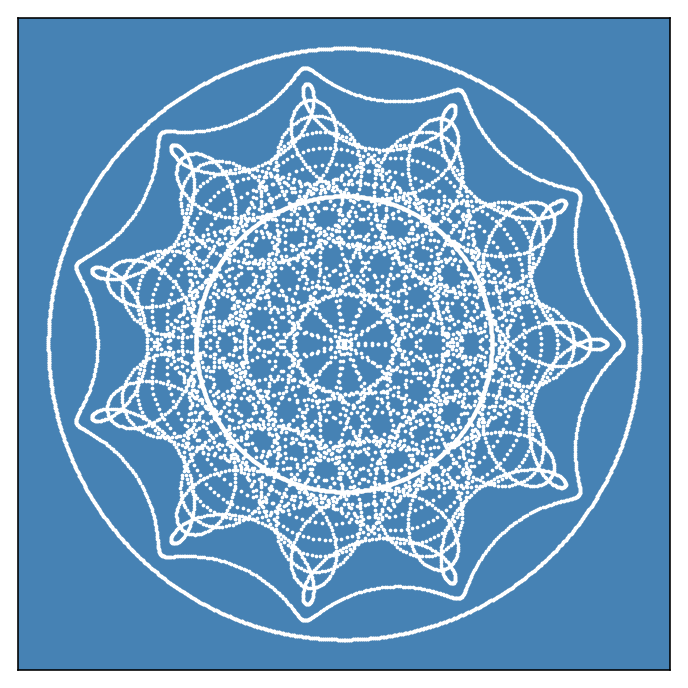

In [7]:
orbiters_single((1,-10),facecolor='steelblue',linecolor='white')

It is highly recommended that you try out different values for the number of points at which the two orbiters' paths are sampled (pts1) as well as the number of curves plotted between the two orbits (pts2).

#### Multi-plot

In [8]:
def orbiters_multi(k=5,p1=700,p2=7,flip=False,neg=False,facecolor='darkslateblue',linecolor='seashell'):
    if flip:
        p1,p2=p2,p1
    cnt = 0
    fig = plt.figure(1,figsize=(2.5*k,2.5*k))
    for ii in range(1,k+1):
        for jj in range(1,k+1):
            if neg:
                jj *= -1
            cnt += 1
            tup_lines, tup1, tup2 = orbiters(frac=(jj,ii),pts1=p1,pts2=p2)
            ax = fig.add_subplot(k,k,cnt,facecolor=facecolor)
            ax.scatter(tup1[0],tup1[1],c=linecolor,marker='.',s=3)
            ax.scatter(tup2[0],tup2[1],c=linecolor,marker='.',s=3)
            if p2<p1:
                for kk in range(p2):
                    ax.scatter(tup_lines[0][:,kk],tup_lines[1][:,kk],c=linecolor,marker='.',s=1)
            else:
                for kk in range(p1):
                    ax.scatter(tup_lines[0][kk],tup_lines[1][kk],c=linecolor,marker='.',s=1)
            ax.set_aspect('equal', 'box')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set(xlim=(-2.1, 2.1), ylim=(-2.1, 2.1))

We plot out the patterns for different angular velocities of the orbiters. The column index gives us the angular velocity of the inner orbiter and the row index gives us the angular velocity of the outer orbiter. Both row and column indices start with 1. By default, we sample the two orbits at 700 points and a total of 7 curves including the two orbits.

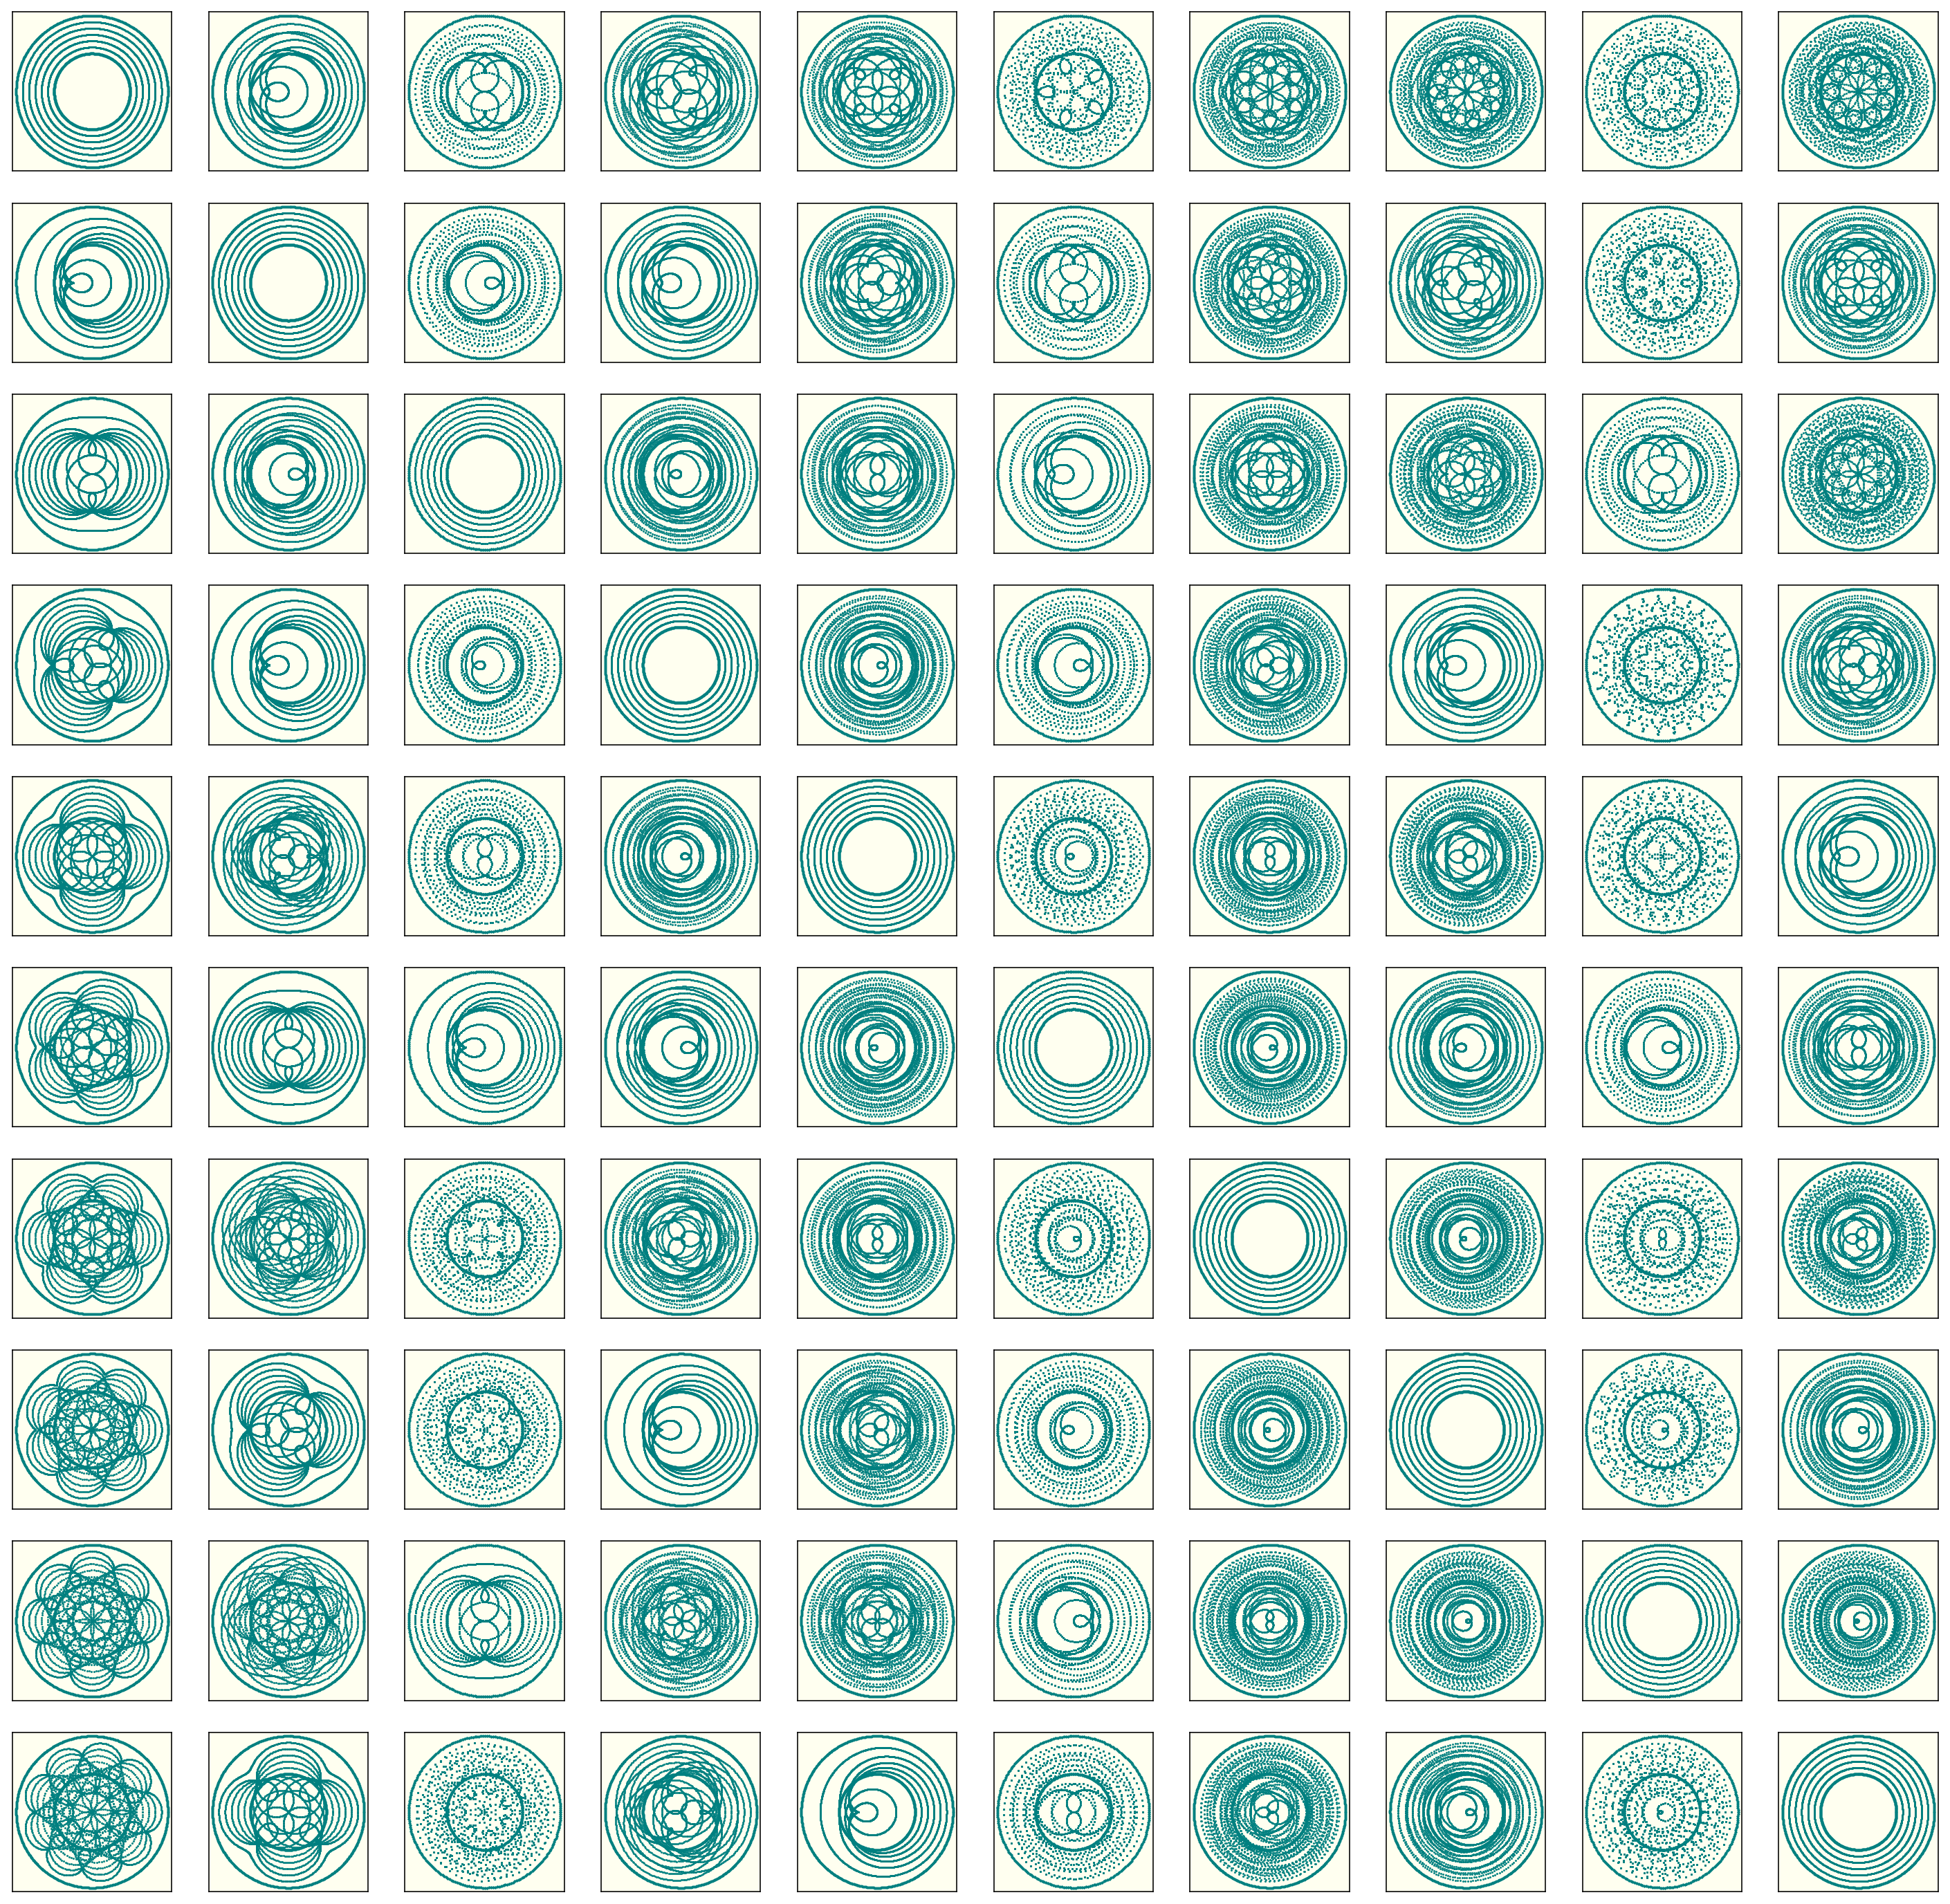

In [9]:
orbiters_multi(k=10,facecolor='ivory',linecolor='teal')

We now simply flip the directions in which the orbiters travel, i.e. continue to have the inner one go anti-clockwise but make the outer one go clockwise. To do so, we make the **neg** argument true. As we can see, just this tiny modification changes the patterns significantly!

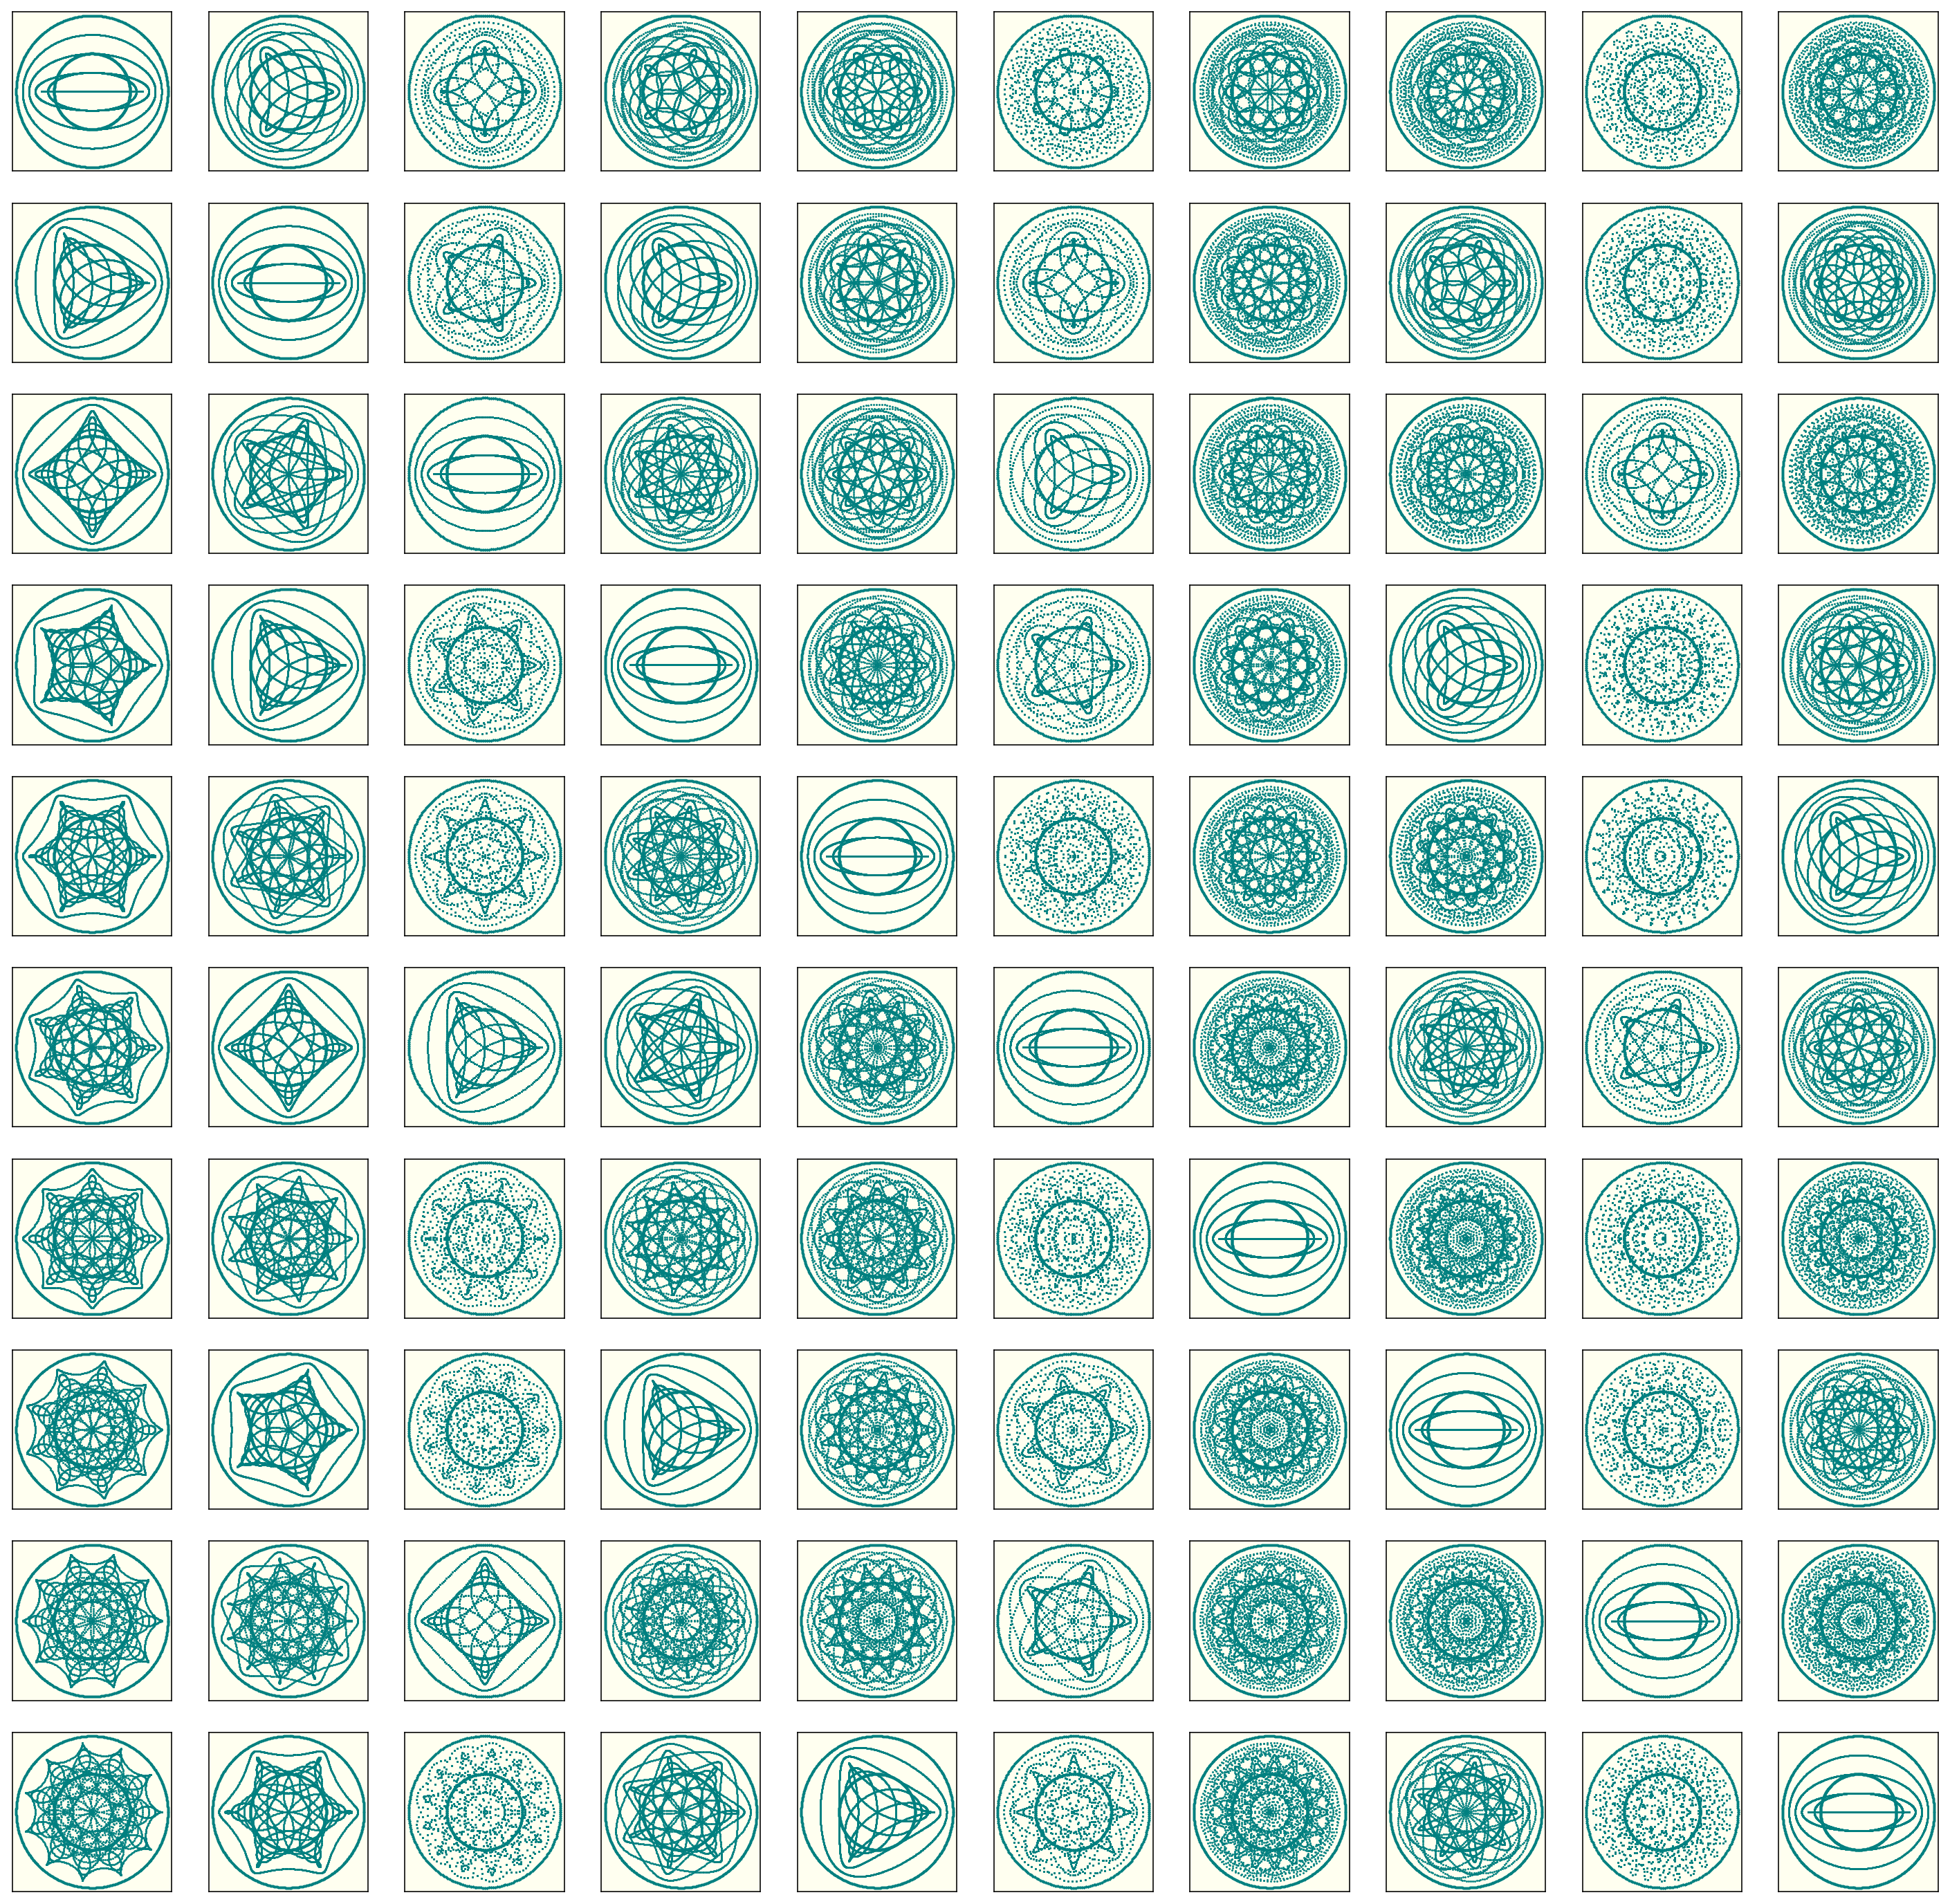

In [10]:
orbiters_multi(k=10,neg=True,facecolor='ivory',linecolor='teal')

#### Different resolutions

In [11]:
def orbiters_diff_res(frac=(1,10),pts1=700,facecolor='darkslateblue',linecolor='seashell'):
    cnt = 0
    fig = plt.figure(1,figsize=(10,10))
    for ii in range(1,3):
        for jj in range(1,3):
            cnt += 1
            tup_lines, tup1, tup2 = orbiters(frac=frac,pts1=pts1,pts2=cnt*4)
            ax = fig.add_subplot(2,2,cnt,facecolor=facecolor)
            ax.scatter(tup1[0],tup1[1],c=linecolor,marker='.',s=3)
            ax.scatter(tup2[0],tup2[1],c=linecolor,marker='.',s=3)
            for kk in range(cnt*4):
                ax.scatter(tup_lines[0][:,kk],tup_lines[1][:,kk],c=linecolor,marker='.',s=2)
            ax.set_aspect('equal', 'box')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

Using the function above, we plot out the patterns for different number of curves between the orbits keeping all other parameters constant. The number of time points the orbiters' paths are sampled at is 700. Angular velocities for the inner and outer orbiters are 1 rad/s and 10 rad/s respectively.

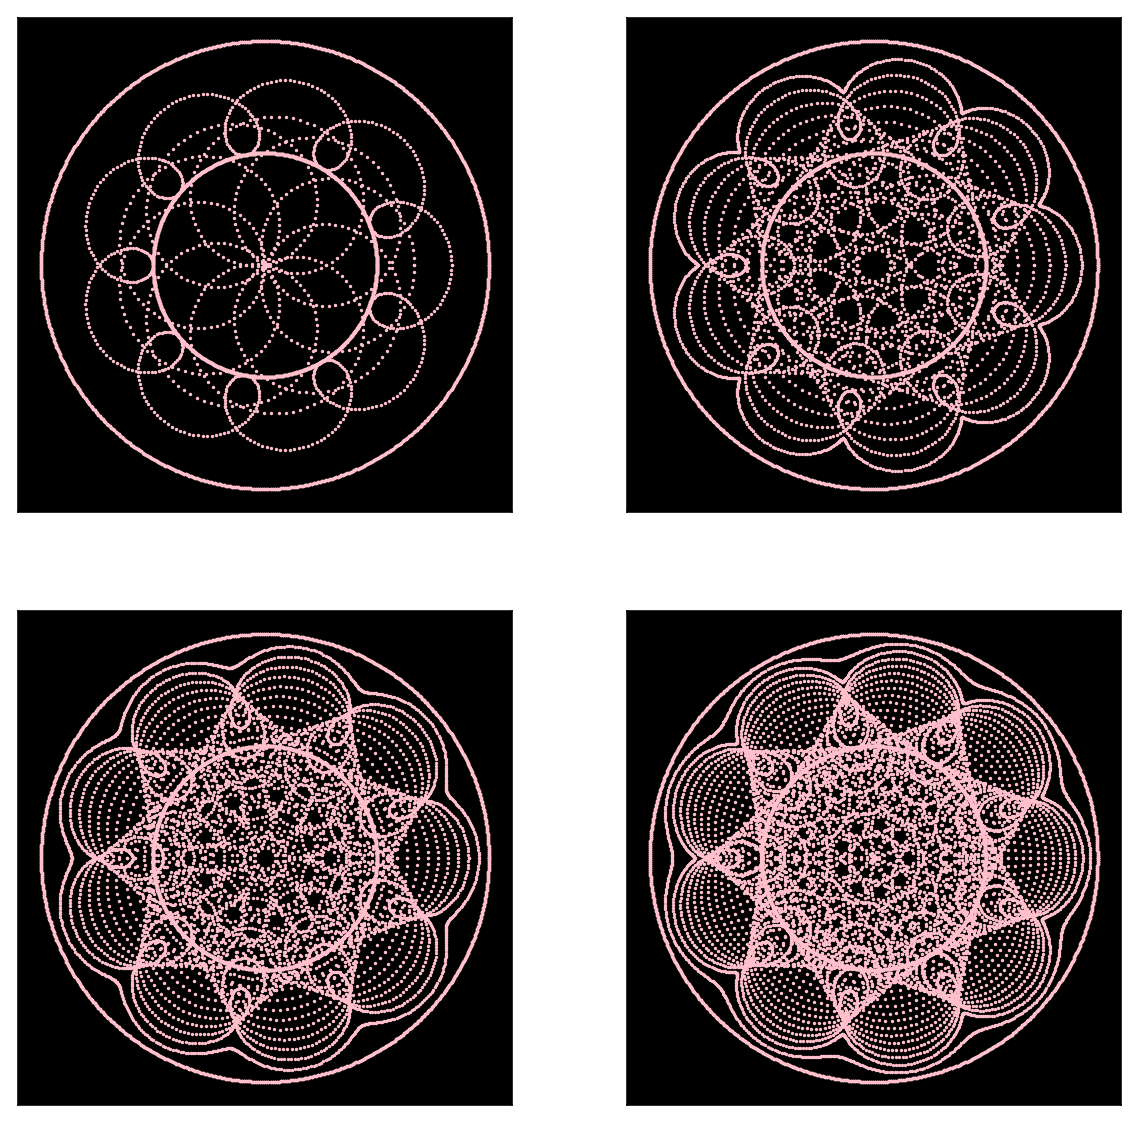

In [12]:
orbiters_diff_res(facecolor='k',linecolor='pink')

Once again, we flip the direction of travel for the outer orbit. Additonally, we change its angular speed to 20 rad/s.

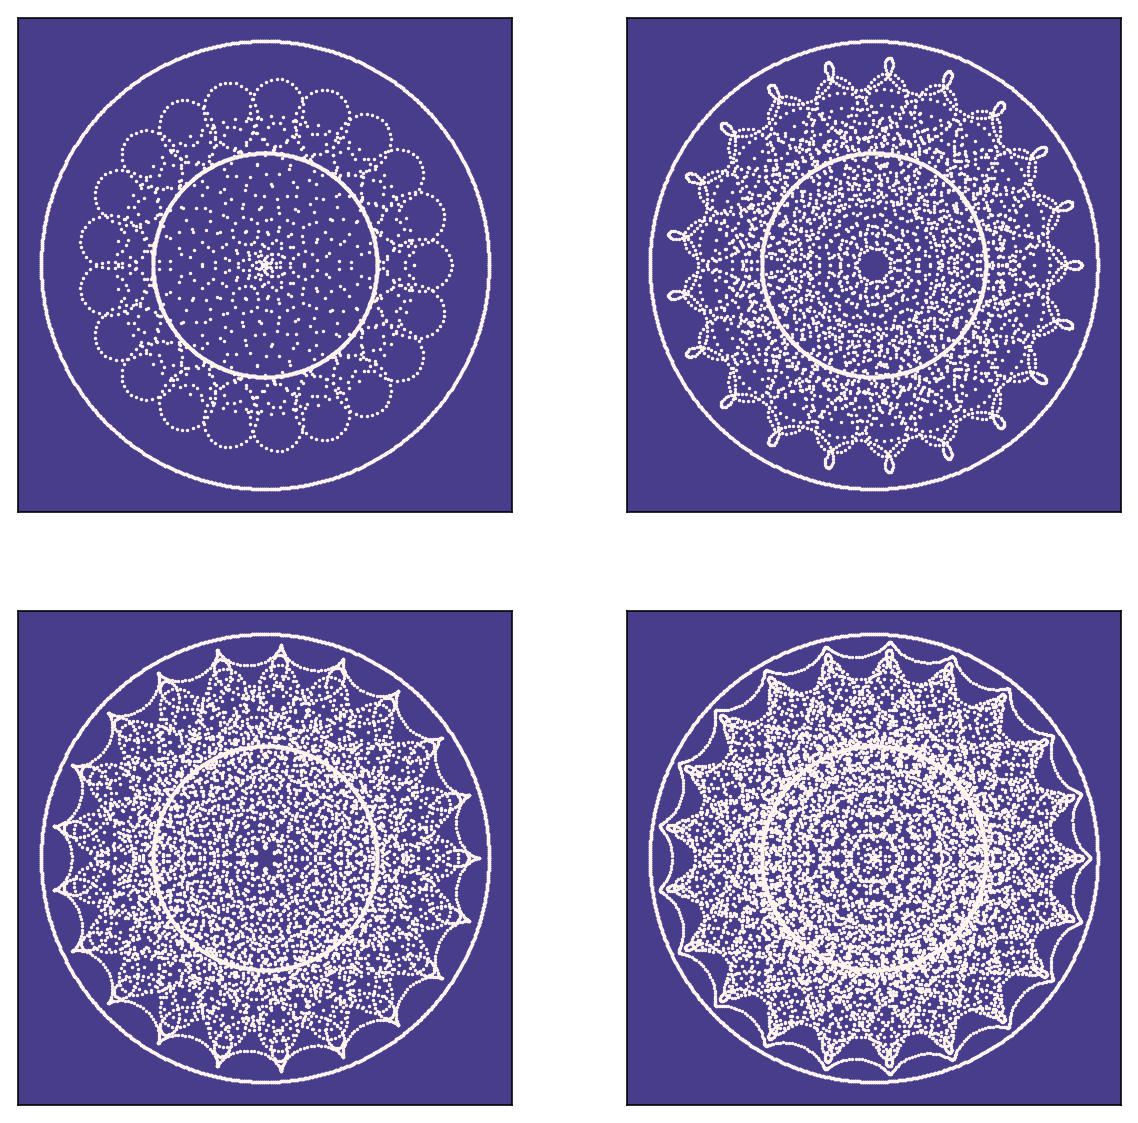

In [13]:
orbiters_diff_res(frac=(1,-20))